ヒストグラム（Histogram）
======================

**ヒストグラム**はデータの分布を視覚的に表現するための棒グラフです。
データをいくつかの区間（階級）に分け、それぞれの区間に含まれるデータの数（度数）を棒の高さで表します。
これにより、データの中心傾向、散らばり、形状などの特徴を一目で把握できます。

## 気温の分析

天気データの気温の分布を見てみます。
Pythonを使ってヒストグラムを描いてみましょう。

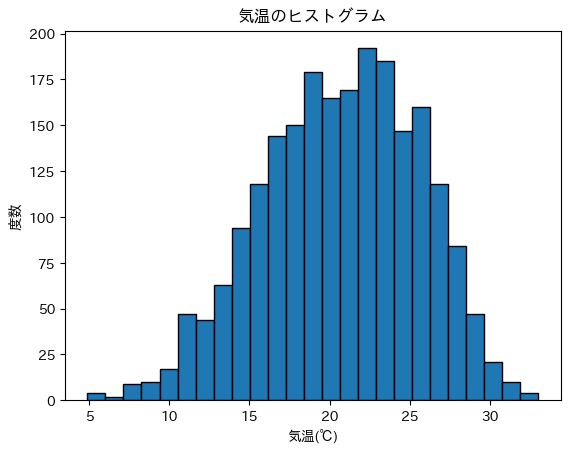

In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

df = pd.read_csv('data.csv')

plt.hist(df['気温(℃)'], bins=25, edgecolor='black')
plt.xlabel('気温(℃)')
plt.ylabel('度数')
plt.title('気温のヒストグラム')
plt.show()

プログラムの説明をします。
1行目は`matplotlib`というライブラリの`pypolot`を`plt`という名前で使えるようにインポートしています。
Matplotlibはグラフ作成でよく使われるライブラリです。さまざまな種類のグラフや図を作成できます。
2行目は`japanize_matplotlib`をインポートしています。
これは日本語のフォントをMatplotlibで使用できるようにするライブラリです。

7行目は`plt.hist()`関数を使用してヒストグラムを作成しています。
この関数は以下の引数を受け取っています。

1. `df['気温(℃)']`
   - 表示するデータの配列です。天気データから気温のみを指定して渡しています。

2. `bins=25`
   - 階級数（区間の数）の指定です。今回は25に指定しました。

3. `edgecolor='black'`
   - 各バーの輪郭の色を指定します。今回は黒色に指定しました。

`bins=25`や`edgecolor='black'`は今まで見てきた引数の渡し方とは違うと気づいたでしょうか。
これは**キーワード引数**と呼ばれる引数の渡し方です。
キーワード引数を使うと、引数の名前（キーワード）を指定して値を渡せます。

キーワード引数には以下のような利点があります。

- 引数の順序を気にせずに指定できる
- 省略可能な引数を簡単に扱える
- コードの読みやすさが向上する

例えば、`plt.hist()`関数には多くのオプションがありますが、キーワード引数を使うと必要な部分だけを指定できます。

今回のプログラムでは、`bins`と`edgecolor`がキーワード引数です。
これらは省略可能で、指定しない場合はデフォルト値が使用されます。
デフォルト値とは、引数が指定されなかった場合に自動的に使用される、あらかじめ決められた値です。

8-10行目では、x軸ラベル、y軸ラベル、グラフのタイトルを設定しています。
最後にplt.show()でグラフを表示します。

ちなみに、キーワード引数を使わず、binsのみデフォルトの値を使う場合のプログラムを書いてみます。
Matplotlibの[ドキュメント](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)によると、
binsのデフォルトの値は10のようです。

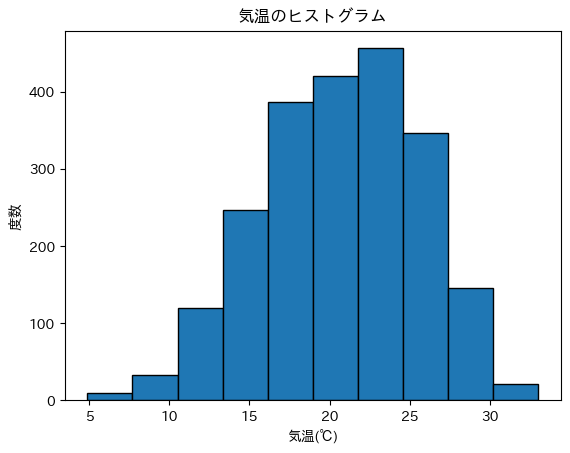

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

df = pd.read_csv('data.csv')

plt.hist(df['気温(℃)'], edgecolor='black')
plt.xlabel('気温(℃)')
plt.ylabel('度数')
plt.title('気温のヒストグラム')
plt.show()

最初のヒストグラムと印象が変わっていると思います。
階級数（bins）の設定は非常に重要になります。
階級数は、データをどのように区分けするかを決定し、ヒストグラムの形状に大きな影響を与えます。
適切な階級数を選ぶことで、データの分布をより正確に表現できます。
階級数が少なすぎると、データの細かな特徴が失われます。
逆に、階級数が多すぎると、ノイズが増えてデータの全体的な傾向が見えにくくなります。
一般的には、データの量や性質に応じて階級数を調整します。
例えば、データ数の平方根を階級数とする方法や、スタージェスの公式{eq}`sturges`を使う方法などがあります。
ただし、最適な階級数は状況によって異なるため、複数の階級数でヒストグラムを作成し、比較検討するとよいでしょう。

```{math}
:label: sturges
k = \log_2 N + 1
```

スタージェスの公式{eq}`sturges`を使ってプログラムを書いてみます。

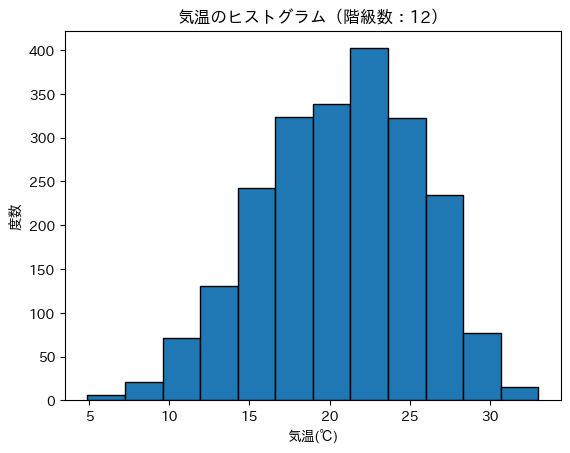

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import math

df = pd.read_csv('data.csv')

# スタージェスの公式を使用して階級数を計算
n = len(df['気温(℃)'])
k = int(math.log2(n) + 1)

plt.hist(df['気温(℃)'], bins=k, edgecolor='black')
plt.xlabel('気温(℃)')
plt.ylabel('度数')
plt.title(f'気温のヒストグラム（階級数：{k}）')
plt.show()

プログラムの10行目を説明します。
`math.log2()`関数を使って、データ数`n`の底`2`の対数を計算します。
スタージェスの公式の計算結果は小数になります。Pythonでは小数を表すデータは**浮動小数点数**と呼ばれています。
ヒストグラムの階級数は整数である必要があるため、浮動小数点数から整数に変換する必要があります。
`int()`関数はその変換をしてくれます。

## 降水量の分析

降水量の分布を見てみます。

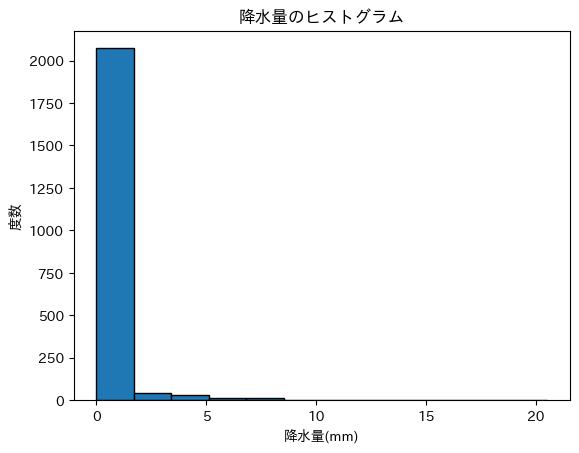

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

df = pd.read_csv('data.csv')
k = int(math.log2(len(df['降水量(mm)'])) + 1)

plt.hist(df['降水量(mm)'], bins=k, edgecolor='black')
plt.xlabel('降水量(mm)')
plt.ylabel('度数')
plt.title(f'降水量のヒストグラム')
plt.show()

図を見ると0が極端に多いため、他の値がわかりにくくなっています。
今回の天気データは4月から6月のデータですが、この期間は雨の日も多くあるものの、
毎時雨が降っているわけではないため、降水量0の時間が多くなっていると考えられます。

では、0を除いて表示してみましょう。

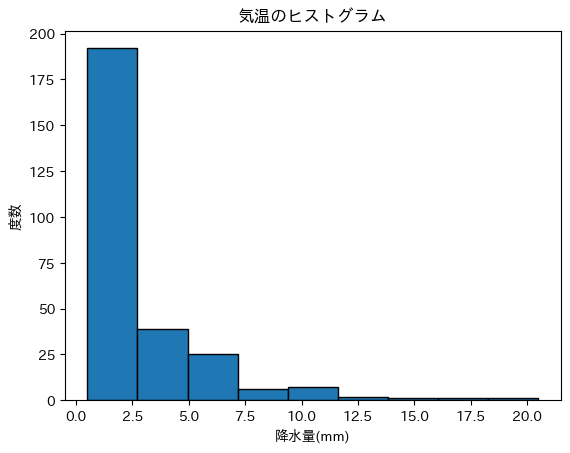

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

df = pd.read_csv('data.csv')
df_rain = df[df['降水量(mm)'] > 0]
k = int(math.log2(len(df_rain['降水量(mm)'])) + 1)

plt.hist(df_rain['降水量(mm)'], bins=k, edgecolor='black')
plt.xlabel('降水量(mm)')
plt.ylabel('度数')
plt.title(f'気温のヒストグラム')
plt.show()

6行目は降水量が0より大きいデータを抽出しています。
詳しく説明すると以下のような処理を行っています。

- `df['降水量(mm)'] > 0`は、'降水量(mm)'列の各値が0より大きいかどうかを判定し、真偽値（TrueまたはFalse）のデータを生成します。
- 外側の`df[...]` は、データフレーム `df` から条件に合う行だけを選択します。ここでは、`df['降水量(mm)'] > 0`で生成された真偽値のデータがTrueとなる行のみが選択されます。
- 選択された行（降水量が0より大きい行）だけで構成される新しいデータフレームが作成され、それに`df_rain`という名前をつけています。

以上の処理により、`df_rain`には降水量が0より大きい時間のデータのみになります。
これによって、実際に雨が降った時間だけのデータでヒストグラムを作成しています。

## 天気の分析

天気の分布を見てみます。
天気は名義尺度のため、ヒストグラムで表すのは適切ではありません。
ここでは、パイチャート（Pie Chart）を使って各カテゴリの割合を表してみます。

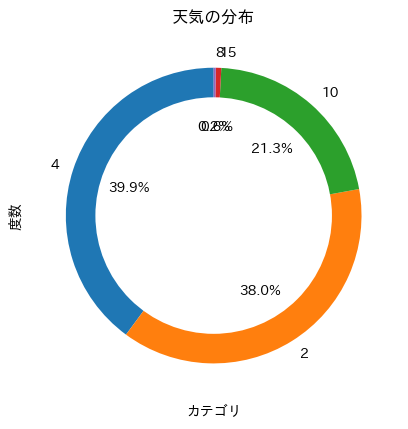

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

w = pd.read_csv('data.csv')['天気']
counts = w.value_counts()

plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.xlabel('カテゴリ')
plt.ylabel('度数')
plt.title('天気の分布')
plt.show()

5行目では天気の列に`w`という名前をつけています。
これまではCSVファイルを読み込んでデータフレームにし、そのデータフレームから列を取り出していました。
今回は、その流れを1行で書いています。

6行目の`value_counts()`は、データの中の各値がいくつあるかを数えて列として返すメソッドです。
ちなみにpandasの列はシリーズといい、インデックスと値のペアで構成されています。
`value_counts()`メソッドの結果もシリーズとして返されます。

7行目はパイチャートを作成しています。
`counts.values`は各天気の出現回数になり、これがグラフの各部分の大きさを決めます。
`labels=counts.index`は各部分に付けるラベルとなります。

図中のラベルは天気のコードで、その意味は{numref}`code-w`になります。
表は[こちら](https://www.data.jma.go.jp/obd/stats/data/mdrr/man/tenki_kigou.html)から抜粋しました。

```{table} 天気のコード
:name: code-w

| コード | 天気 |
|--------|------|
| 2      | 晴れ |
| 4      | 曇り   |
| 8      | 霧   |
| 10     | にわか雨 |
| 15     | 雨氷 |
```